# Assess the behavioral performance (compositionally) of ANNs with different training schemes

#### Compare practiced v. 2-rule overlap v. 1-rule overlap accuracy performances

# 2/4/2021

In [1]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from importlib import reload
import tools
import pandas as pd

datadir = '../../data/model_results/experiment8/'

In [10]:
df_nopretraining = {}
df_nopretraining['Accuracy'] = []
df_nopretraining['Condition'] = []
df_nopretraining['Simulation'] = []
df_2rulepretrain = {}
df_2rulepretrain['Accuracy'] = []
df_2rulepretrain['Condition'] = []
df_2rulepretrain['Simulation'] = []
df_1rulepretrain = {}
df_1rulepretrain['Accuracy'] = []
df_1rulepretrain['Condition'] = []
df_1rulepretrain['Simulation'] = []

nsimulations=20
for sim in range(0,10):
    #
    ### Organize no pretraining model data
    df = pd.read_csv(datadir + 'expt8_adam_90accCutOff_2layers_practice_PerTaskData' + str(sim) + '.csv')
#     df = pd.read_csv(datadir + 'expt7_adam_200epochs_2layers_practice_PerTaskData' + str(sim) + '.csv')
    tmp = df.loc[df.NumPracticedTasks==4]
    practiced_tasks = tmp.loc[tmp.Condition=='Practiced']
    novel_tasks = tmp.loc[tmp.Condition=='Novel']
    #
    df_nopretraining['Accuracy'].append(np.mean(practiced_tasks.Accuracy.values*100))
    df_nopretraining['Simulation'].append(sim)
    df_nopretraining['Condition'].append('Practiced')
    #
    overlap2 = []
    overlap1 = []
    for i in novel_tasks.index:
        tmpnov = novel_tasks.loc[i]
        rule_sim = []
        for j in practiced_tasks.index:
            tmpprac = practiced_tasks.loc[j]
            rule_sim.append(int(tmpprac.Logic==tmpnov.Logic) + int(tmpprac.Sensory==tmpnov.Sensory) + int(tmpprac.Motor==tmpnov.Motor))
        if np.max(rule_sim)==2:
            overlap2.append(tmpnov.Accuracy)
        elif np.max(rule_sim)==1:
            overlap1.append(tmpnov.Accuracy)
        else:
            raise Exception('error')

    df_nopretraining['Accuracy'].append(np.mean(overlap2)*100)
    df_nopretraining['Simulation'].append(sim)
    df_nopretraining['Condition'].append('2-rule')
    #
    df_nopretraining['Accuracy'].append(np.mean(overlap1)*100)
    df_nopretraining['Simulation'].append(sim)
    df_nopretraining['Condition'].append('1-rule')
    
    #####################################
    ### Organize 2-rule pretraining model data
    df = pd.read_csv(datadir + 'expt8_adam_90accCutOff_2layers_2rulepretraining_practice_PerTaskData' + str(sim) + '.csv')
    tmp = df.loc[df.NumPracticedTasks==4]
    practiced_tasks = tmp.loc[tmp.Condition=='Practiced']
    novel_tasks = tmp.loc[tmp.Condition=='Novel']
    #
    df_2rulepretrain['Accuracy'].append(np.mean(practiced_tasks.Accuracy.values*100))
    df_2rulepretrain['Simulation'].append(sim)
    df_2rulepretrain['Condition'].append('Practiced')
    #
    overlap2 = []
    overlap1 = []
    for i in novel_tasks.index:
        tmpnov = novel_tasks.loc[i]
        rule_sim = []
        for j in practiced_tasks.index:
            tmpprac = practiced_tasks.loc[j]
            rule_sim.append(int(tmpprac.Logic==tmpnov.Logic) + int(tmpprac.Sensory==tmpnov.Sensory) + int(tmpprac.Motor==tmpnov.Motor))
        if np.max(rule_sim)==2:
            overlap2.append(tmpnov.Accuracy)
        elif np.max(rule_sim)==1:
            overlap1.append(tmpnov.Accuracy)
        else:
            raise Exception('error')

    df_2rulepretrain['Accuracy'].append(np.mean(overlap2)*100)
    df_2rulepretrain['Simulation'].append(i)
    df_2rulepretrain['Condition'].append('2-rule')
    #
    df_2rulepretrain['Accuracy'].append(np.mean(overlap1)*100)
    df_2rulepretrain['Simulation'].append(i)
    df_2rulepretrain['Condition'].append('1-rule')
    
    #####################################
    ### Organize 1-rule pretraining model data
    df = pd.read_csv(datadir + 'expt8_adam_90accCutOff_2layers_pretraining_practice_PerTaskData' + str(sim) + '.csv')
    tmp = df.loc[df.NumPracticedTasks==4]
    practiced_tasks = tmp.loc[tmp.Condition=='Practiced']
    novel_tasks = tmp.loc[tmp.Condition=='Novel']
    #
    df_1rulepretrain['Accuracy'].append(np.mean(practiced_tasks.Accuracy.values*100))
    df_1rulepretrain['Simulation'].append(sim)
    df_1rulepretrain['Condition'].append('Practiced')
    #
    overlap2 = []
    overlap1 = []
    for i in novel_tasks.index:
        tmpnov = novel_tasks.loc[i]
        rule_sim = []
        for j in practiced_tasks.index:
            tmpprac = practiced_tasks.loc[j]
            rule_sim.append(int(tmpprac.Logic==tmpnov.Logic) + int(tmpprac.Sensory==tmpnov.Sensory) + int(tmpprac.Motor==tmpnov.Motor))
        if np.max(rule_sim)==2:
            overlap2.append(tmpnov.Accuracy)
        elif np.max(rule_sim)==1:
            overlap1.append(tmpnov.Accuracy)
        else:
            raise Exception('error')

    df_1rulepretrain['Accuracy'].append(np.mean(overlap2)*100)
    df_1rulepretrain['Simulation'].append(sim)
    df_1rulepretrain['Condition'].append('2-rule')
    #
    df_1rulepretrain['Accuracy'].append(np.mean(overlap1)*100)
    df_1rulepretrain['Simulation'].append(sim)
    df_1rulepretrain['Condition'].append('1-rule')
       
    
df_nopretraining = pd.DataFrame(df_nopretraining)
df_1rulepretrain = pd.DataFrame(df_1rulepretrain)
df_2rulepretrain = pd.DataFrame(df_2rulepretrain)

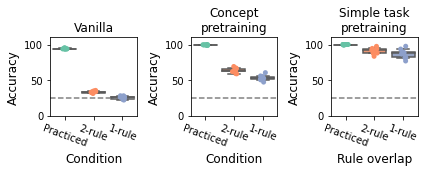

In [17]:
# sns.boxplot(df_compositionalbehav,x="Condition",y="Accuracy")
plt.figure(figsize=(6,2.5))
plt.subplot(131)
plt.title('Vanilla',fontsize=12)
ax = sns.boxplot(x="Condition",y="Accuracy",data=df_nopretraining,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="Set2")
ax = sns.stripplot(x="Condition",y="Accuracy",data=df_nopretraining,
              dodge=True,palette="Set2")
plt.plot(np.arange(-0.5,3.5),np.repeat(25,4),'gray',linestyle='--')
plt.xticks(rotation=-20,fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,110)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Condition', fontsize=12)

plt.subplot(132)
plt.title('Concept\npretraining',fontsize=12)
ax = sns.boxplot(x="Condition",y="Accuracy",data=df_1rulepretrain,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="Set2")
ax = sns.stripplot(x="Condition",y="Accuracy",data=df_1rulepretrain,
              dodge=True,palette="Set2")
plt.plot(np.arange(-0.5,3.5),np.repeat(25,4),'gray',linestyle='--')
plt.xticks(rotation=-20,fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,110)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Condition', fontsize=12)

plt.subplot(133)
plt.title('Simple task\npretraining',fontsize=12)
ax = sns.boxplot(x="Condition",y="Accuracy",data=df_2rulepretrain,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="Set2")
ax = sns.stripplot(x="Condition",y="Accuracy",data=df_2rulepretrain,
              dodge=True,palette="Set2")
plt.plot(np.arange(-0.5,3.5),np.repeat(25,4),'gray',linestyle='--')
plt.xticks(rotation=-20,fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,110)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Rule overlap', fontsize=12)
plt.tight_layout()
plt.savefig('ANN_BehavioralPerformanceCompositional.png',dpi=300)